In [18]:
from standardInclude import *

In [19]:
path = "./data/Run_2D1/"
dataset = "Run 2-D1"
csv_files = [x for x in os.listdir(path) if "csv" in x]
names = [x.split("_")[len(x.split("_")) -1].split(".csv")[0] for x in csv_files]
print(csv_files)
print(names)
counter = 0

['run_2D1_ctags.csv', 'run_2D1_fillcuts.csv', 'run_2D1_losses.csv']
['ctags', 'fillcuts', 'losses']


In [20]:
dfs = {}
for i, file in enumerate(csv_files):
    dfi = pandas.read_csv(path+file, header=None)
    dfs[names[i]] = dfi
    print(names[i])
    print(dfi.head())
    print("***************")

ctags
       0  1      2           3   4
0  25894  0  24351   6335910.0  39
1  25894  1  48448  12740600.0  80
2  25894  2  55775  14689800.0  91
3  25894  3  51358  13302500.0  83
4  25894  4  55795  14548600.0  90
***************
fillcuts
       0  1   2    3
0  25894  0  39  111
1  25894  1  80   94
2  25894  2  91  109
3  25894  3  83   95
4  25894  4  90  103
***************
losses
       0  1         2
0  25894  0  0.003695
1  25894  1  0.003758
2  25894  2  0.003938
3  25894  3  0.003937
4  25894  4  0.003960
***************


ctags/t0Val >=  0.0037  and fills >  25  and ctags >  5000  and t0val >  4000000.0


/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


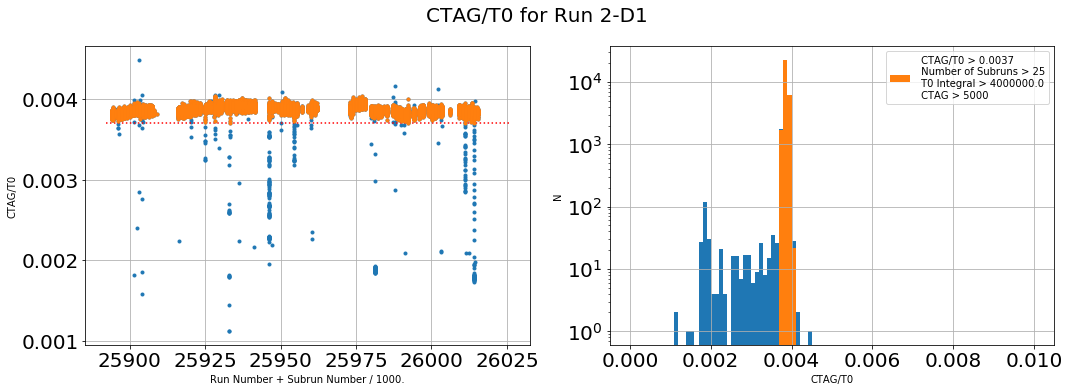

/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


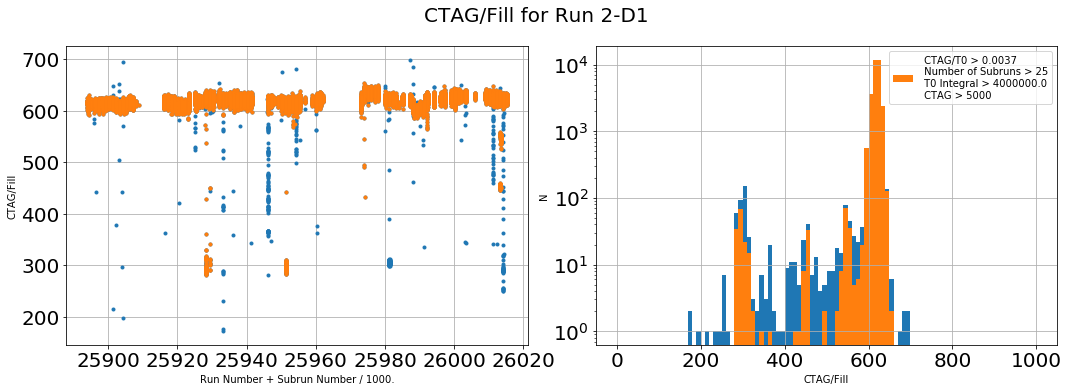

In [27]:
df = dfs['ctags']

ctagPerFillCut = 0.0037
nSubuncut = 25
t0_int_cut = 4e6
ctag_total_cut = 5000

print("ctags/t0Val >= ", ctagPerFillCut," and fills > ", nSubuncut," and ctags > ", ctag_total_cut," and t0val > ", t0_int_cut)

df_cut = df.loc[df[2]/df[3] > ctagPerFillCut].loc[df[4] > nSubuncut].loc[df[2] > ctag_total_cut].loc[df[3] > t0_int_cut]

#  run  | subrun | ctags |    t0val    | fills  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [ctagPerFillCut, ctagPerFillCut], ":", color='red')
ax[1].hist(df[2]/df[3],bins=100,range=(0,0.01))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,0.01),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/T0 for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/T0")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/T0")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_CTAG_over_T0.png", bbox_inches='tight')

plt.show()

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[4], ".")
ax[1].hist(df[2]/df[4],bins=100,range=(0,1000))
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[4], ".")
ax[1].hist(df_cut[2]/df_cut[4],bins=100,range=(0,1000),label=(" CTAG/T0 > "+str(ctagPerFillCut)+
                                                              "\n Number of Subruns > "+str(nSubuncut)+
                                                              "\n T0 Integral > "+str(t0_int_cut)+
                                                              "\n CTAG > "+str(ctag_total_cut)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("CTAG/Fill for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("CTAG/Fill")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel("CTAG/Fill")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill.png", bbox_inches='tight')

plt.show()

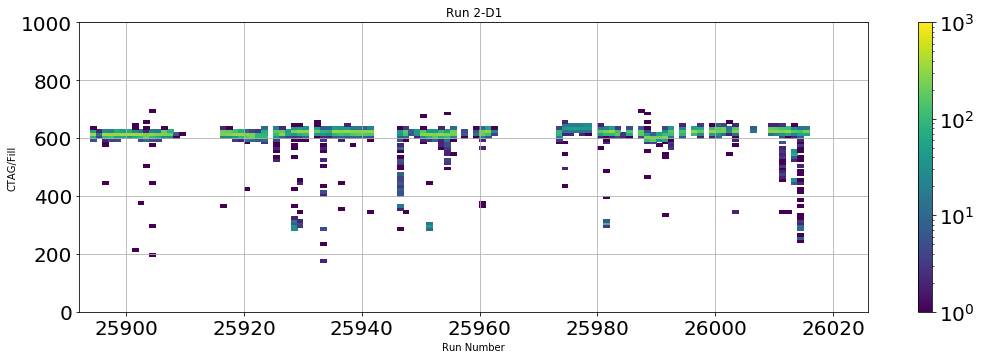

In [28]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2
plt.hist2d(df[0], df[2]/df[4], range=((runstart, runend), (0,1000)),bins=((runend-runstart),100),
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("CTAG/Fill")
plt.tight_layout()
plt.grid()
plt.title(dataset)
plt.savefig("./images/DQC_Images_"+dataset+"_Ctag_per_fill_hist.png", bbox_inches='tight')

plt.show()

fillFraction >= 0.2


/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jlab/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


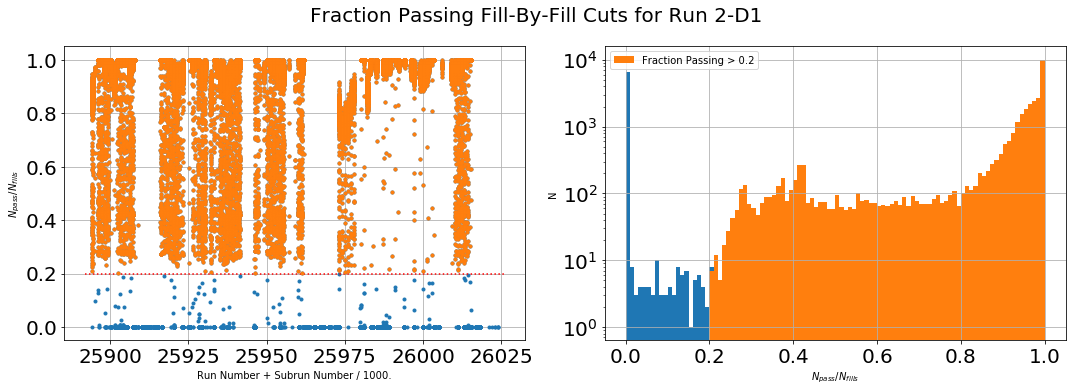

In [23]:
df = dfs['fillcuts']

fraction_passing = 0.2

print("fillFraction >=", fraction_passing)

df_cut = df.loc[df[2]/df[3] > fraction_passing]

#    run  | subrun | fills | fills   
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2]/df[3], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [fraction_passing, fraction_passing], ":", color='red')

ax[1].hist(df[2]/df[3],bins=100,range=(0,1))

ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2]/df_cut[3], ".")
ax[1].hist(df_cut[2]/df_cut[3],bins=100,range=(0,1),label=("Fraction Passing > "+str(fraction_passing)))
ax[1].legend()

ax[1].set_yscale("log")
plt.suptitle("Fraction Passing Fill-By-Fill Cuts for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel(r"$N_{pass}/N_{fills}$")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"$N_{pass}/N_{fills}$")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts.png", bbox_inches='tight')

plt.show()

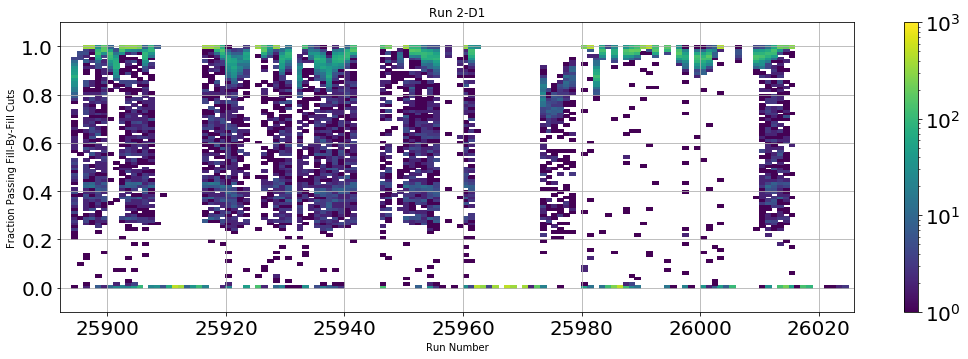

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2
plt.hist2d(df[0], df[2]/df[3], range=((runstart, runend), (-0.1,1.1)),bins=((runend-runstart),100),
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
#plt.xlim(25920, 25930)

plt.colorbar()
ax.set_xlabel("Run Number")
ax.set_ylabel("Fraction Passing Fill-By-Fill Cuts")
plt.tight_layout()
plt.grid()
plt.title(dataset)
plt.savefig("./images/DQC_Images_"+dataset+"_FractionPassingCuts_hist.png", bbox_inches='tight')

plt.show()

lossRatio <=  0.008


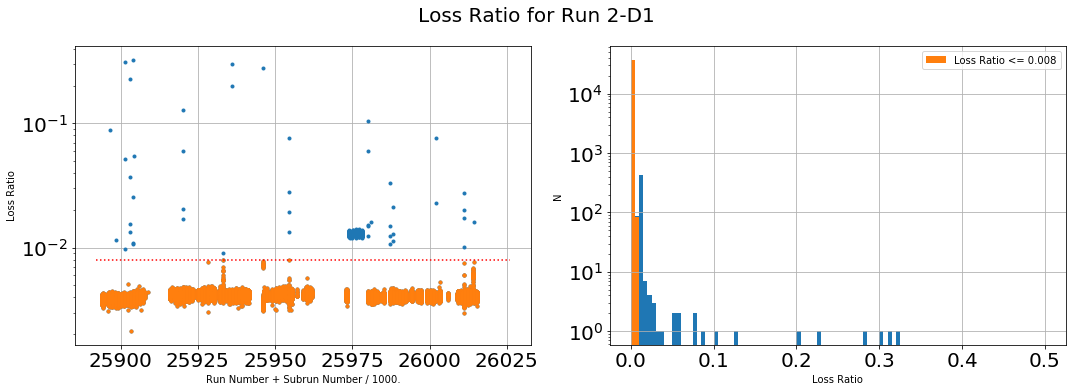

In [29]:
df = dfs['losses']

loss_ratio = 0.008

print("lossRatio <= ",loss_ratio)

df_cut = df.loc[df[2] <= loss_ratio]

#      run  | subrun | lossratio  
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(df[0]+df[1]/1000., df[2], ".")
ax[0].plot(df_cut[0]+df_cut[1]/1000., df_cut[2], ".")
ax[0].plot([np.min(df[0])-2, np.max(df[0])+2], [loss_ratio, loss_ratio], ":", color='red')

ax[0].set_yscale("log")
ax[1].hist(df[2],bins=100,range=(0,.5))
ax[1].hist(df_cut[2],bins=100,range=(0,.5),label=("Loss Ratio <= "+str(loss_ratio)))
ax[1].legend()
ax[1].set_yscale("log")
plt.suptitle("Loss Ratio for "+dataset, y=1.08, fontsize=20)
ax[0].set_ylabel("Loss Ratio")
ax[0].set_xlabel("Run Number + Subrun Number / 1000.")
ax[1].set_xlabel(r"Loss Ratio")
ax[1].set_ylabel("N")
plt.tight_layout()
for axi in ax:
    axi.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio.png", bbox_inches='tight')

plt.show()

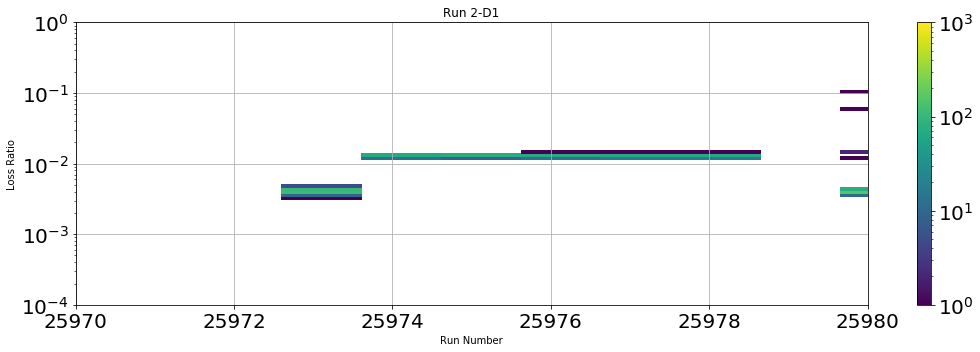

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
runstart = np.min(df[0])-2
runend = np.max(df[0])+2

logbins = [ np.linspace(runstart, runend, runend-runstart), 
            np.logspace(-4,0,100)
          ]

plt.hist2d(df[0], df[2], bins=logbins,
          norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
plt.xlim(25970, 25980)

plt.colorbar()
plt.yscale("log")
ax.set_xlabel("Run Number")
ax.set_ylabel("Loss Ratio")
plt.title(dataset)
plt.tight_layout()
plt.grid()
plt.savefig("./images/DQC_Images_"+dataset+"_LossRatio_hist.png", bbox_inches='tight')

plt.show()